# Milestone one

The purpose of this study is to construct a predictive model that can accurately categorise an employee's salary category as either high, medium or low so that appropriate action may be taken. The model will make use of a variety of independent factors, such as the individual's level of happiness, the average number of hours worked each month, the amount of time spent working for the company, their current status, whether or not they have been promoted in the past five years, and the sales department. By tackling this issue, our goal is to give HR departments with insights and a tool that will allow them to better understand the elements that influence salary categorization and perhaps make decisions that are data-driven regarding the compensation of their employees.

The data set i have chosen for this project is the "HR_comma_sep", (https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv) from Kaggle. This data set contains 14998 records of employees and 10 variables/features.

For my graphical analysis, I will plot barplot of sales to demonstrate the department of each employee, a barplot of salary to display the salary category of each employee, a histogram of satisfaction level of the employees and a box plot demonstrating last evaluation.

For model building, I will use 4 types of models to predict salary ie logistics regression, random forests, decision trees and naive bayes and use scoring metrics that includes accuracy, precision, F1 score and recall score to determine the best model for predicting employees salary.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df=pd.read_csv("C:/Users/HP PC/Downloads/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


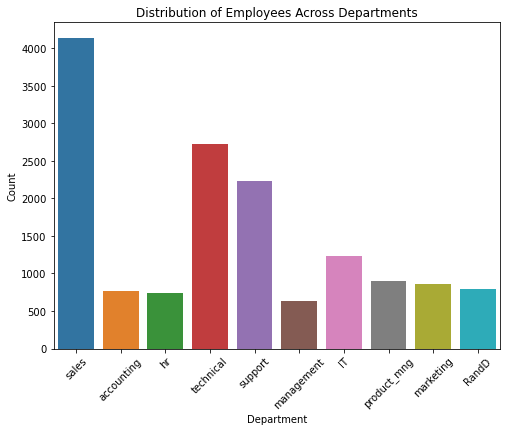

In [ ]:
# Bar plot for "sales" variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sales")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Distribution of Employees Across Departments")
plt.xticks(rotation=45)
plt.show()


The distribution shows that the sales department has the highest distribution of employees while management department has the least number of employees.

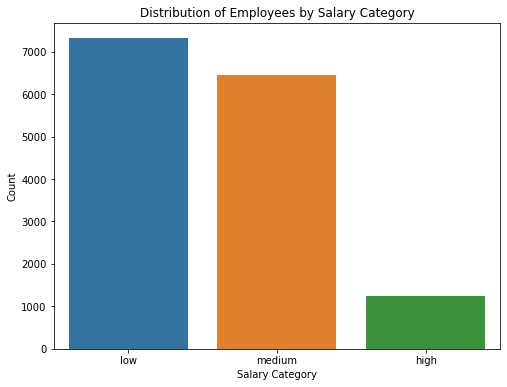

In [ ]:
# Bar plot for "salary" variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="salary")
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.title("Distribution of Employees by Salary Category")
plt.show()

The distribution shows that the number of employees who receive low salary is higher followed by medium category while high salaried employees are the least.

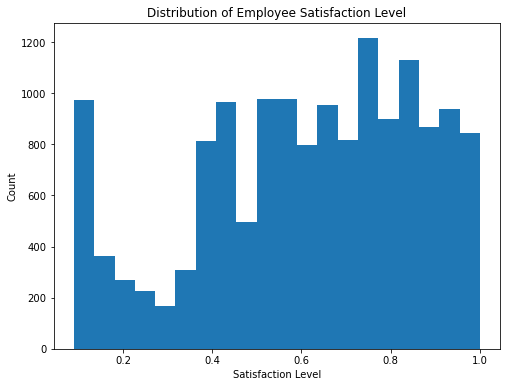

In [ ]:
# Histogram for "satisfaction_level"
plt.figure(figsize=(8, 6))
plt.hist(df["satisfaction_level"], bins=20)
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.title("Distribution of Employee Satisfaction Level")
plt.show()

The distribution of satisfaction level is not normally distributed ie its not symmetric.

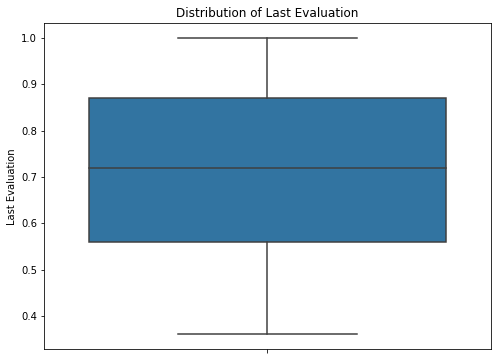

In [ ]:
# Box plot for "last_evaluation"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="last_evaluation")
plt.ylabel("Last Evaluation")
plt.title("Distribution of Last Evaluation")
plt.show()

The distribution indicates that there are no present outliers in last evaluation variable. The mean of last evaluation is roughly 0.75.

# Milestone two

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
#step 1
# Data transformation: Feature Scaling
scaler = MinMaxScaler()
numerical_cols = ["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,2,0.285047,0.125,0,1,0,sales,low
1,0.780220,0.781250,5,0.775701,0.500,0,1,0,sales,medium
2,0.021978,0.812500,7,0.822430,0.250,0,1,0,sales,medium
3,0.692308,0.796875,5,0.593458,0.375,0,1,0,sales,low
4,0.307692,0.250000,2,0.294393,0.125,0,1,0,sales,low


In [ ]:
#step 2
# Data transformation : One-Hot Encoding
categorical_cols = ["sales", "salary"]
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,2,0.285047,0.125,0,1,0,sales,low
1,0.780220,0.781250,5,0.775701,0.500,0,1,0,sales,medium
2,0.021978,0.812500,7,0.822430,0.250,0,1,0,sales,medium
3,0.692308,0.796875,5,0.593458,0.375,0,1,0,sales,low
4,0.307692,0.250000,2,0.294393,0.125,0,1,0,sales,low


In [ ]:
#step 3
# Data transformation: Binning
df["average_hours_category"] = pd.cut(df["average_montly_hours"], bins=[0, 150, 250, np.inf], labels=["Low", "Medium", "High"])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_hours_category
0,0.318681,0.265625,2,0.285047,0.125,0,1,0,sales,low,Low
1,0.780220,0.781250,5,0.775701,0.500,0,1,0,sales,medium,Low
2,0.021978,0.812500,7,0.822430,0.250,0,1,0,sales,medium,Low
3,0.692308,0.796875,5,0.593458,0.375,0,1,0,sales,low,Low
4,0.307692,0.250000,2,0.294393,0.125,0,1,0,sales,low,Low


In [ ]:
#step 4
# Data transformation: Log Transformation
df["satisfaction_level_log"] = np.log1p(df["satisfaction_level"])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_hours_category,satisfaction_level_log
0,0.318681,0.265625,2,0.285047,0.125,0,1,0,sales,low,Low,0.276632
1,0.780220,0.781250,5,0.775701,0.500,0,1,0,sales,medium,Low,0.576737
2,0.021978,0.812500,7,0.822430,0.250,0,1,0,sales,medium,Low,0.021740
3,0.692308,0.796875,5,0.593458,0.375,0,1,0,sales,low,Low,0.526093
4,0.307692,0.250000,2,0.294393,0.125,0,1,0,sales,low,Low,0.268264


In [ ]:
#step 5
# Data transformation: Feature Interaction
df["interaction_feature"] = df["average_montly_hours"] * df["time_spend_company"]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_hours_category,satisfaction_level_log,interaction_feature
0,0.318681,0.265625,2,0.285047,0.125,0,1,0,sales,low,Low,0.276632,0.035631
1,0.780220,0.781250,5,0.775701,0.500,0,1,0,sales,medium,Low,0.576737,0.387850
2,0.021978,0.812500,7,0.822430,0.250,0,1,0,sales,medium,Low,0.021740,0.205607
3,0.692308,0.796875,5,0.593458,0.375,0,1,0,sales,low,Low,0.526093,0.222547
4,0.307692,0.250000,2,0.294393,0.125,0,1,0,sales,low,Low,0.268264,0.036799


# Milestone three


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

# Specify the features (independent variables) and the target variable (dependent variable)
features = df.drop("salary", axis=1)  
target = df["salary"] 


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# View the shapes of the split datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)



Training data shape: (11999, 12) (11999,)
Testing data shape: (3000, 12) (3000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)[:, 1]


C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]


In [ ]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)[:, 1]


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_proba = nb.predict_proba(X_test)[:, 1]


In [ ]:
# Confusion Matrix
def print_evaluation_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

print("Logistic Regression:")
print_evaluation_metrics(y_test, logreg_pred)
print()

print("Random Forest:")
print_evaluation_metrics(y_test, rf_pred)
print()

print("Decision Trees:")
print_evaluation_metrics(y_test, dt_pred)
print()

print("Naive Bayes:")
print_evaluation_metrics(y_test, nb_pred)
print()


Logistic Regression:
Confusion Matrix:
[[   0  144  109]
 [   0 1063  411]
 [   0  849  424]]
Accuracy: 0.49566666666666664
Precision: 0.44462119963068003
Recall: 0.49566666666666664
F1 Score: 0.45822052480553094

Random Forest:
Confusion Matrix:
[[  83   89   81]
 [   6 1036  432]
 [  11  506  756]]
Accuracy: 0.625
Precision: 0.6348825522783307
Recall: 0.625
F1 Score: 0.619926740595221

Decision Trees:
Confusion Matrix:
[[ 95  80  78]
 [ 88 947 439]
 [ 85 441 747]]
Accuracy: 0.5963333333333334
Precision: 0.5976240790473013
Recall: 0.5963333333333334
F1 Score: 0.5969487315855411

Naive Bayes:
Confusion Matrix:
[[  18  210   25]
 [  27 1339  108]
 [  51 1103  119]]
Accuracy: 0.492
Precision: 0.4642672930283225
Recall: 0.492
F1 Score: 0.3938252114579391



C:\Users\HP PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the model development and evaluation, the following conclusions can be drawn:

1. Logistic Regression: The accuracy of the logistic regression model was approximately 49.6%. Additionally, the precision, recall, and F1 score were relatively low.

2. Random Forest: The random forest model outperformed logistic regression by approximately 62.5% in terms of accuracy. In comparison to logistic regression, the precision, recall, and F1 score were notably higher.

3. Decision Trees: The accuracy of the decision tree model was approximately 59.6%. The performance was comparable to that of random forest, albeit with slightly inferior precision, recall, and F1 score values. However, it was still superior to logistic regression.

4. The accuracy of the naive Bayes model was approximately 49.2 percent. Additionally, the precision, recall, and F1 score were relatively low.

Overall, among the evaluated models, the random forest model demonstrated the highest levels of accuracy, precision, recall, and F1 score. Compared to other models, it demonstrated a superior ability to predict differences in salary categories.






